In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')   
sns.set(style="whitegrid")           #setting seaborn styles
plt.rcParams["figure.figsize"]=(13,7)  #setting seaborn style

In [12]:
df=pd.read_csv('netflix_updated.csv')

In [13]:
df.head()

,Unnamed: 0,title,type,main_genre,listed_in,rating,main_country,release_year,year_added,month_added,date_added,day_of_week,duration_int,duration_type,director,cast,description
0,0,Dick Johnson Is Dead,Movie,Documentaries,Documentaries,PG-13,United States,2020,2021,9,2021-09-25,Saturday,90.0,min,Kirsten Johnson,Not listed,"As her father nears the end of his life, filmm..."
1,1,Blood & Water,TV Show,International TV Shows,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,South Africa,2021,2021,9,2021-09-24,Friday,2.0,Seasons,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","After crossing paths at a party, a Cape Town t..."
2,2,Ganglands,TV Show,Crime TV Shows,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,various,2021,2021,9,2021-09-24,Friday,1.0,Season,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",To protect his family from a powerful drug lor...
3,3,Jailbirds New Orleans,TV Show,Docuseries,"Docuseries, Reality TV",TV-MA,various,2021,2021,9,2021-09-24,Friday,1.0,Season,unknown,Not listed,"Feuds, flirtations and toilet talk go down amo..."
4,4,Kota Factory,TV Show,International TV Shows,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,India,2021,2021,9,2021-09-24,Friday,2.0,Seasons,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",In a city of coaching centers known to train I...


In [15]:
columns= df.columns.tolist()
print(columns)

['Unnamed: 0', 'title', 'type', 'main_genre', 'listed_in', 'rating', 'main_country', 'release_year', 'year_added', 'month_added', 'date_added', 'day_of_week', 'duration_int', 'duration_type', 'director', 'cast', 'description']


In [21]:
print("total titles in dataset :")
df.shape[0]

total titles in dataset :


8794

In [23]:
print("Movies vs TV Shows :")
df['type'].value_counts()  

Movies vs TV Shows :


type
Movie      6128
TV Show    2666
Name: count, dtype: int64

In [31]:
print("Unique values in each column :\n")
x = df.nunique().to_dict()
print(x)

Unique values in each column :

{'Unnamed: 0': 8794, 'title': 8793, 'type': 2, 'main_genre': 36, 'listed_in': 513, 'rating': 14, 'main_country': 86, 'release_year': 74, 'year_added': 14, 'month_added': 12, 'date_added': 1714, 'day_of_week': 7, 'duration_int': 210, 'duration_type': 3, 'director': 4528, 'cast': 7682, 'description': 8762}


In [38]:
print("Years range in dataset: ", min(df['release_year']),"-", max(df['release_year']))

Years range in dataset:  1925 - 2021


Count of titles Release per year :



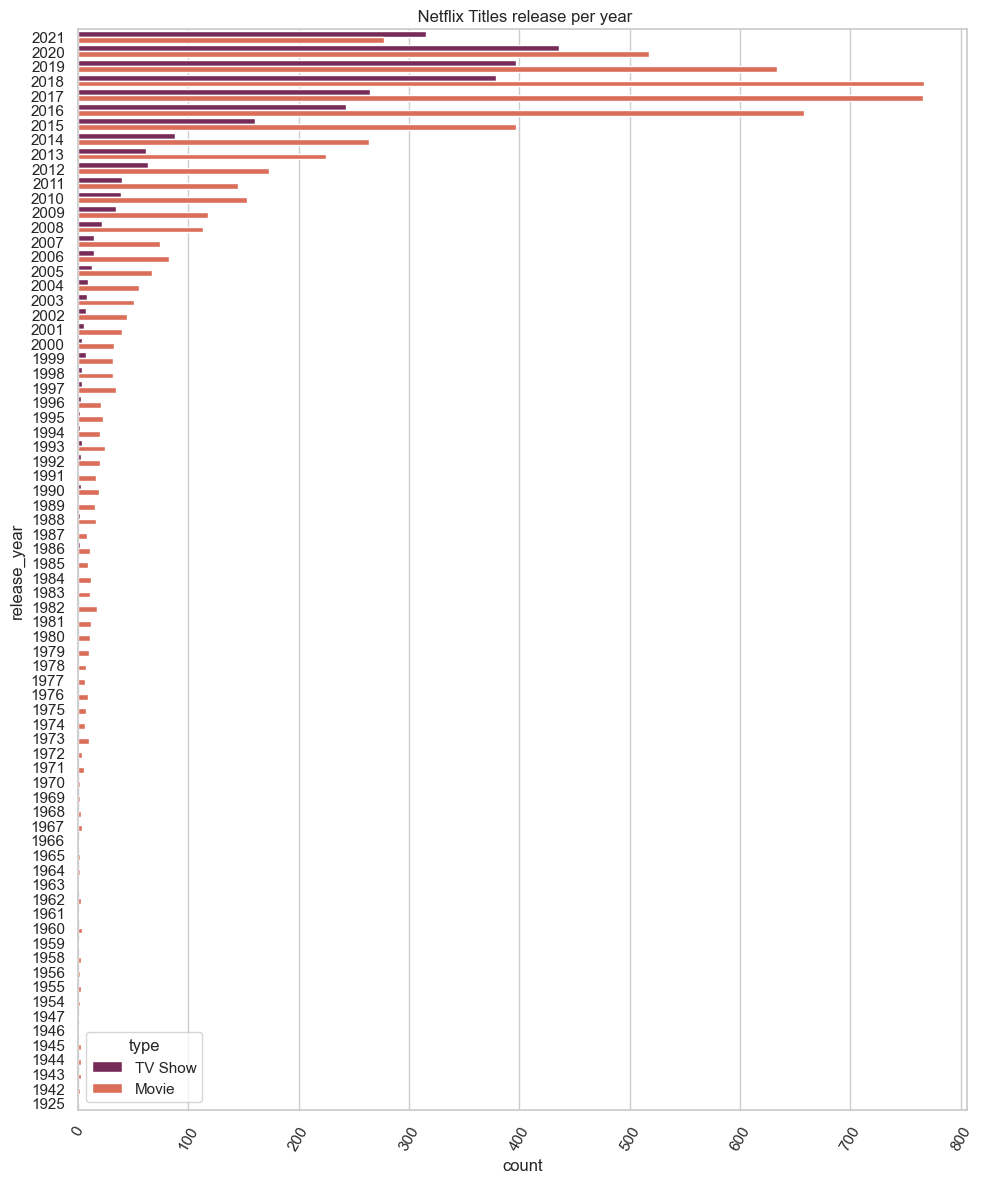

In [57]:
print("Count of titles Release per year :\n")
plt.figure(figsize=(10,12))
sns.countplot(data=df , y="release_year",order=sorted(df["release_year"].unique() , reverse=True),palette="rocket",hue="type")
plt.xlabel=("Release Year")
plt.ylabel=("No of Titles")
plt.title(" Netflix Titles release per year")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Ratings Distribution : 



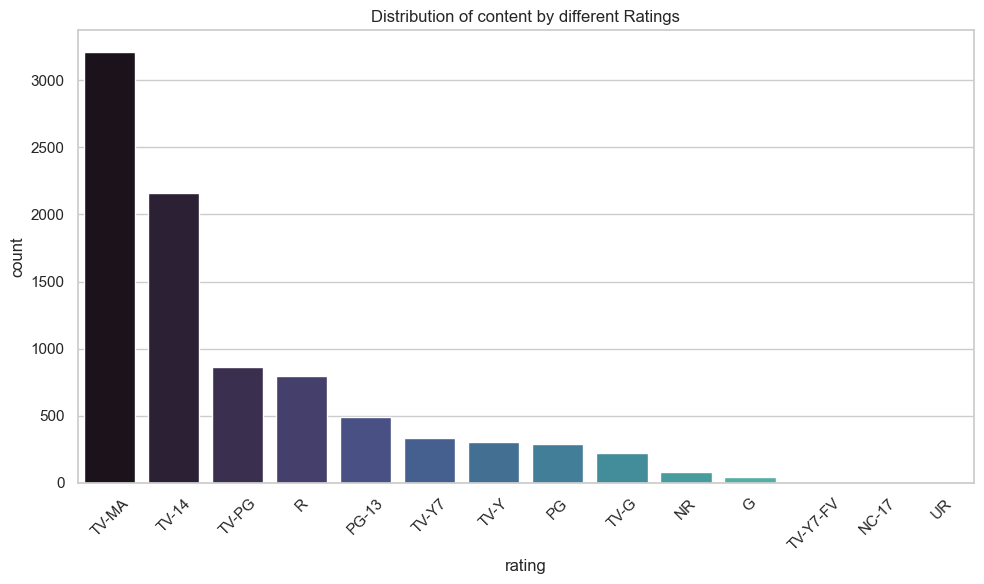

In [78]:
print("Ratings Distribution : \n") 
plt.figure(figsize=(10,6))
sns.countplot(data=df , x="rating" , order=df['rating'].value_counts().index, palette="mako")
plt.xlabel=("rating")
plt.ylabel=("count")
plt.title("Distribution of content by different Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
df_genre = df['main_genre'].unique().tolist()
print(df_genre)

['Documentaries', 'International TV Shows', 'Crime TV Shows', 'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas', 'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers', 'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV', 'Anime Series', 'International Movies', 'Sci-Fi & Fantasy', 'Classic Movies', 'TV Shows', 'Stand-Up Comedy', 'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows', 'Cult Movies', 'Independent Movies', 'TV Horror', 'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies', 'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies']


Different Genres and their Distribution :



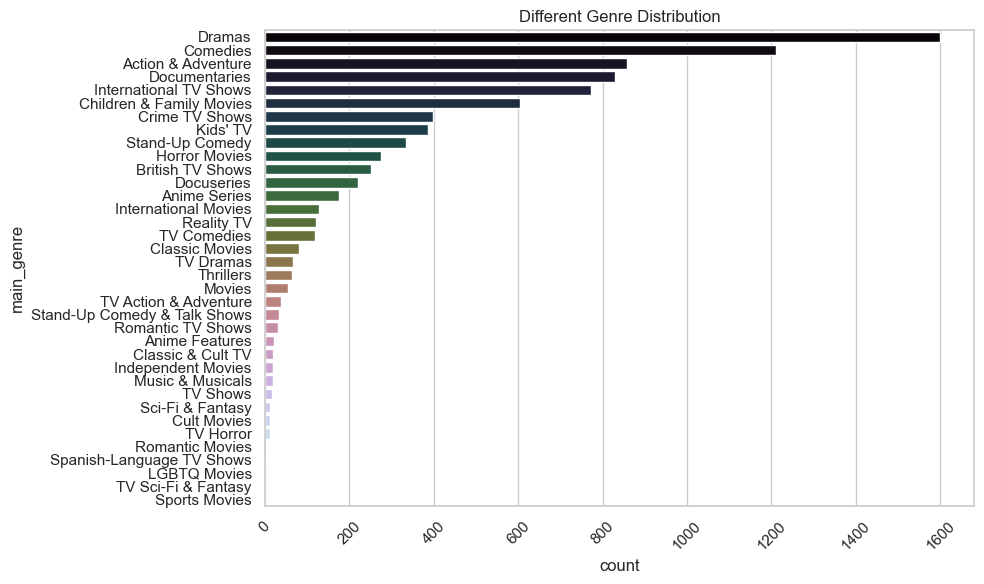

In [79]:
print("Different Genres and their Distribution :\n") 
plt.figure(figsize=(10,6))
sns.countplot(data=df , y="main_genre" , order=df['main_genre'].value_counts().index, palette="cubehelix")
plt.xlabel=("No of Genre")
plt.ylabel=("Genres")
plt.title("Different Genre Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 countries by Content Production :



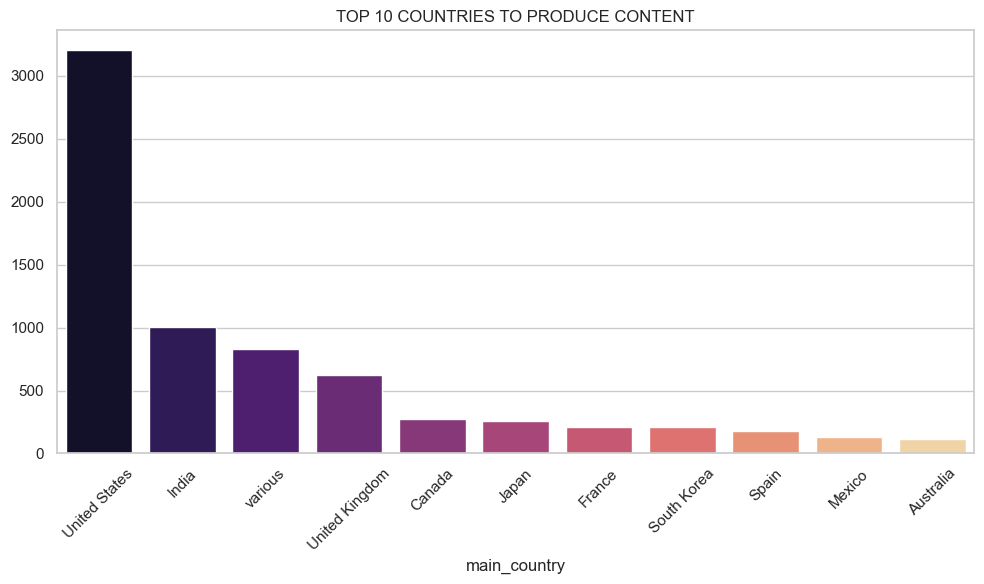

In [83]:
print("Top 10 countries by Content Production :\n")
top10_countries= df['main_country'].value_counts().head(11)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_countries.index , y=top10_countries.values , palette="magma")
plt.xlabel=("No of Countries")
plt.ylabel=("main_country")
plt.title("TOP 10 COUNTRIES TO PRODUCE CONTENT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Directors by Content Production :



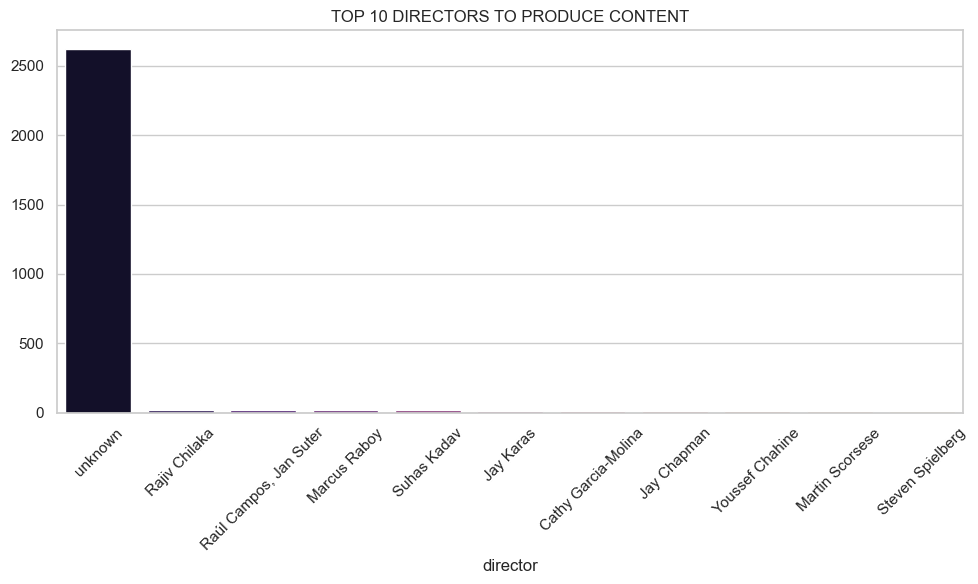

In [85]:
print("Top 10 Directors by Content Production :\n")
top10_directors= df['director'].value_counts().head(11)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_directors.index , y=top10_directors.values , palette="magma")
plt.xlabel=("No of Countries")
plt.ylabel=("director")
plt.title("TOP 10 DIRECTORS TO PRODUCE CONTENT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Movies Distribution :



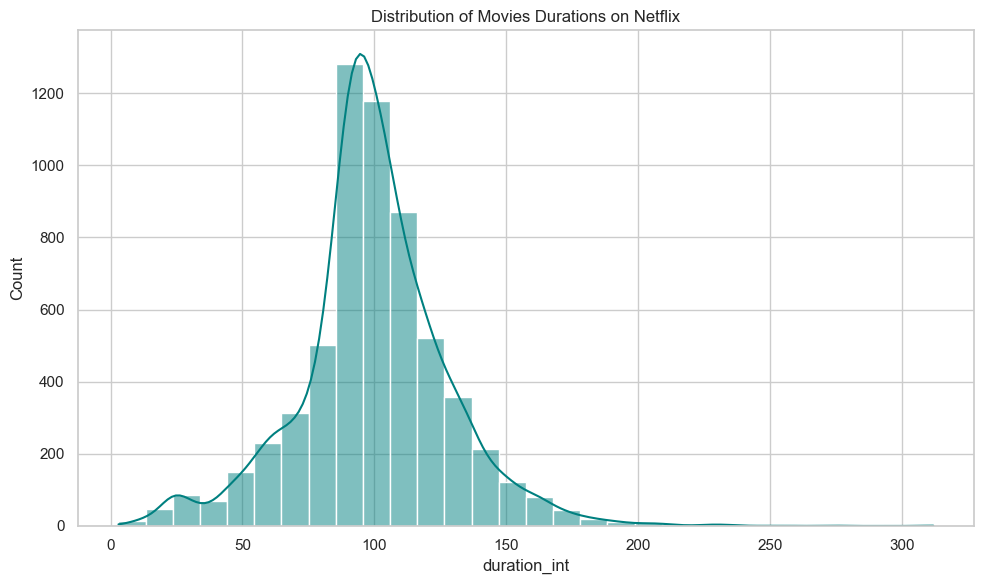

In [105]:
print(" Movies Distribution :\n")
movies_df=df[df['duration_type']=='min']
plt.figure(figsize=(10,6))
sns.histplot(movies_df['duration_int'],kde=True,bins=30,color='teal')
plt.xlabel=("duration_type")
plt.ylabel=("Number of Movies")
plt.title("Distribution of Movies Durations on Netflix")
plt.tight_layout()
plt.show()


 Movies Distribution :



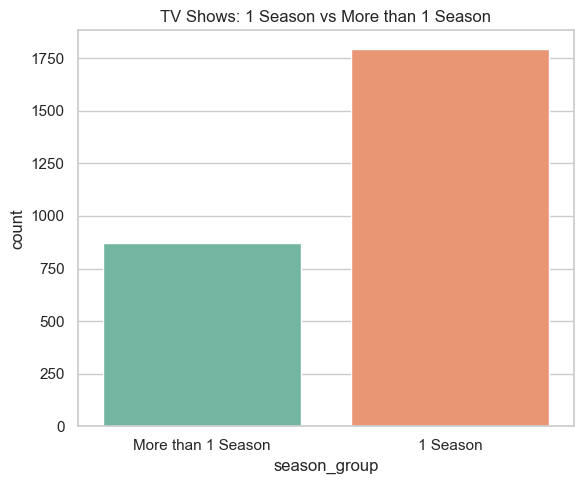

In [104]:
print(" Movies Distribution :\n")
df['duration_type'] = df['duration_type'].replace({'Season': 'Seasons'})
tv_df = df[df['duration_type'] == 'Seasons']
tv_df['season_group'] = tv_df['duration_int'].apply(lambda x: '1 Season' if x == 1 else 'More than 1 Season')

plt.figure(figsize=(6,5))
sns.countplot(data=tv_df, x='season_group', palette='Set2')

plt.title("TV Shows: 1 Season vs More than 1 Season")
plt.xlabel=("Season Category")
plt.ylabel=("Number of Shows")
plt.tight_layout()
plt.show()

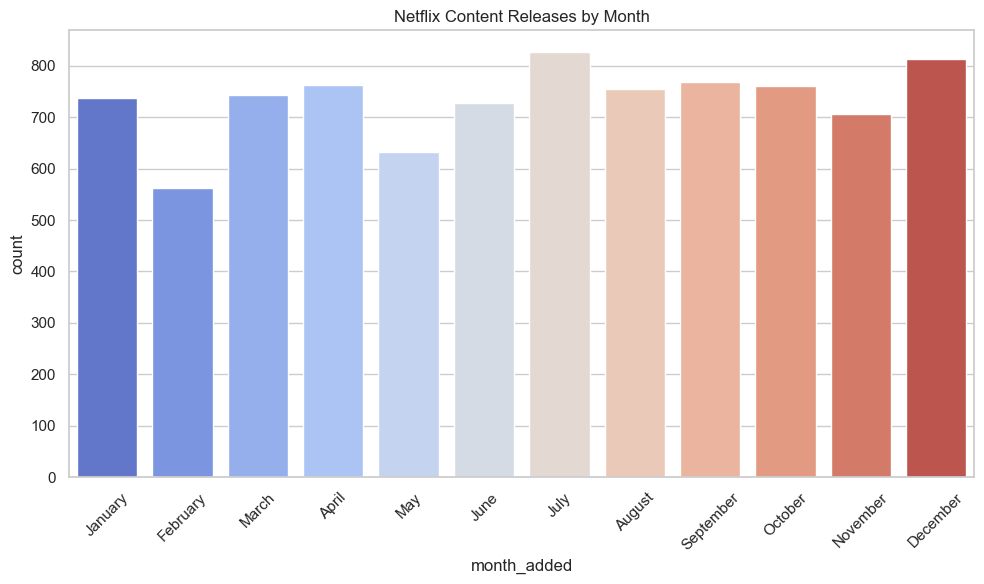

In [115]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Apply the map (make sure your column is numeric)
df['month_added'] = df['month_added'].map(month_map)

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='month_added', order=month_order, palette='coolwarm')
plt.title("Netflix Content Releases by Month")
plt.xlabel=("Month")
plt.ylabel=("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


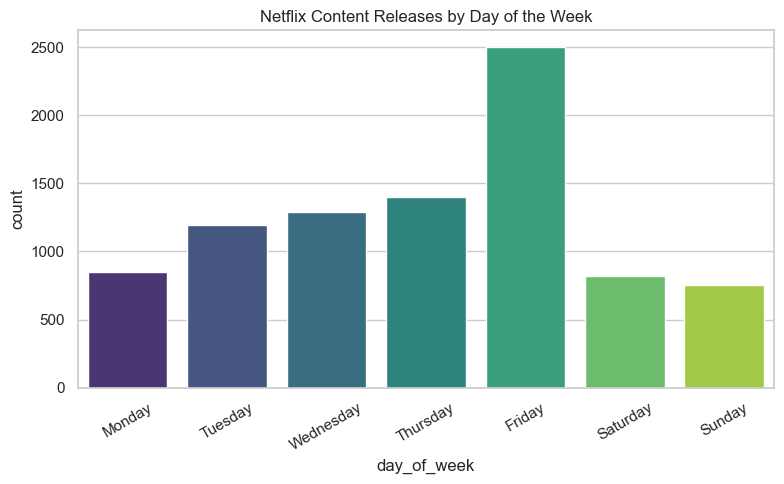

In [114]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='day_of_week', order=days_order, palette='viridis')
plt.title("Netflix Content Releases by Day of the Week")
plt.xlabel=("Day")
plt.ylabel=("Number of Titles")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
